In [18]:
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('east_coast.csv')
df2 = pd.read_csv('gulf_of_mexico.csv')
df = pd.read_csv('slr_sla_gom_keep_ref_90.csv')

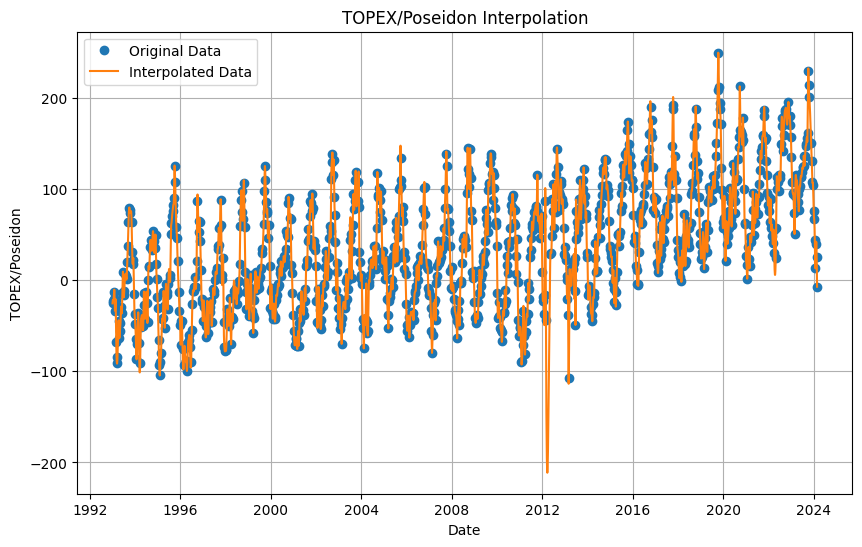

In [3]:
# Assuming you already have a DataFrame named 'df' with columns ['date', 'TOPEX/Poseidon']

# Drop rows with NaN values in 'TOPEX/Poseidon' column
df = df.dropna(subset=['TOPEX/Poseidon'])

# Sort the DataFrame by date
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
df = df.sort_values(by='date')  # Sort DataFrame by 'date'

# Remove infinite values in 'TOPEX/Poseidon' column
df = df[np.isfinite(df['TOPEX/Poseidon'])]

# Perform cubic interpolation
cs = CubicSpline(df['date'].values.astype(np.int64), df['TOPEX/Poseidon'].values)
interpolated_dates = pd.date_range(start=df['date'].iloc[0], end=df['date'].iloc[-1], freq='D')
interpolated_values = cs(interpolated_dates.values.astype(np.int64))

# Create a new DataFrame for interpolated data
interpolated_df_GOM = pd.DataFrame({'date': interpolated_dates, 'TOPEX/Poseidon': interpolated_values})

# Plot the interpolated data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['TOPEX/Poseidon'], 'o', label='Original Data')
plt.plot(interpolated_df_GOM['date'], interpolated_df_GOM['TOPEX/Poseidon'], '-', label='Interpolated Data')
plt.title('TOPEX/Poseidon Interpolation')
plt.xlabel('Date')
plt.ylabel('TOPEX/Poseidon')
plt.legend()
plt.grid(True)
plt.show()


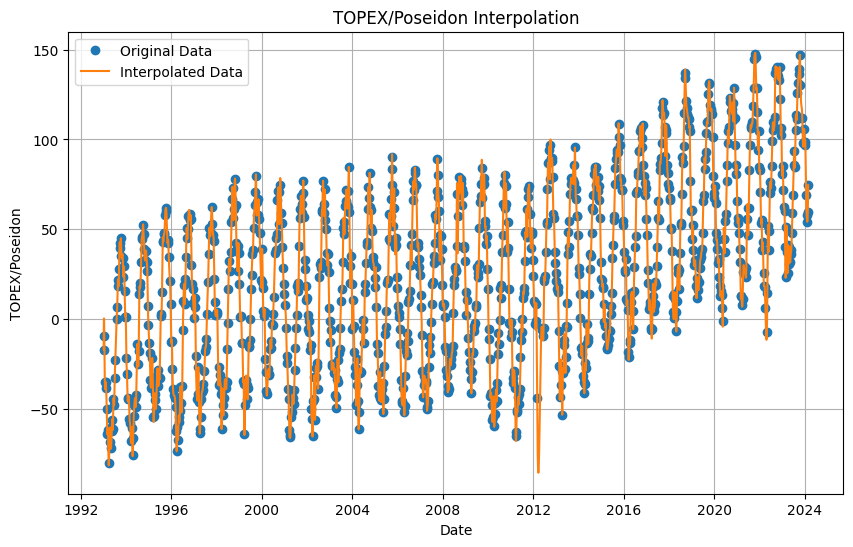

In [4]:
df3 = pd.read_csv('slr_sla_na_keep_ref.csv')
# Assuming you already have a DataFrame named 'df' with columns ['date', 'TOPEX/Poseidon']

# Drop rows with NaN values in 'TOPEX/Poseidon' column
df3 = df3.dropna(subset=['TOPEX/Poseidon'])

# Sort the DataFrame by date
df3['date'] = pd.to_datetime(df3['date'])  # Convert 'date' column to datetime
df3 = df3.sort_values(by='date')  # Sort DataFrame by 'date'

# Remove infinite values in 'TOPEX/Poseidon' column
df3 = df3[np.isfinite(df3['TOPEX/Poseidon'])]

# Perform cubic interpolation
cs = CubicSpline(df3['date'].values.astype(np.int64), df3['TOPEX/Poseidon'].values)
interpolated_dates = pd.date_range(start=df3['date'].iloc[0], end=df3['date'].iloc[-1], freq='D')
interpolated_values = cs(interpolated_dates.values.astype(np.int64))

# Create a new DataFrame for interpolated data
interpolated_df_NA = pd.DataFrame({'date': interpolated_dates, 'TOPEX/Poseidon': interpolated_values})

# Plot the interpolated data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df3['date'], df3['TOPEX/Poseidon'], 'o', label='Original Data')
plt.plot(interpolated_df_NA['date'], interpolated_df_NA['TOPEX/Poseidon'], '-', label='Interpolated Data')
plt.title('TOPEX/Poseidon Interpolation')
plt.xlabel('Date')
plt.ylabel('TOPEX/Poseidon')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
df2['Date'] = pd.to_datetime(df2['Date'])
# Merge DataFrames on 'Date' and 'date' columns
merged_df = pd.merge(df2, interpolated_df_GOM, left_on='Date', right_on='date', how='inner')

# Drop the redundant column 'date'
merged_df = merged_df.drop(columns=['date'])
#merged_df = merged_df.drop(['Date'], axis=1)

In [6]:
df1['Date'] = pd.to_datetime(df1['Date'])
# Merge DataFrames on 'Date' and 'date' columns
merged_df_1 = pd.merge(df1, interpolated_df_NA, left_on='Date', right_on='date', how='inner')

# Drop the redundant column 'date'
merged_df_1 = merged_df_1.drop(columns=['date'])
#merged_df_1 = merged_df_1.drop(['Date'], axis=1)

In [37]:
color_df = merged_df.drop(['Date'], axis = 1)
color_df_1 = merged_df_1.drop(['Date'], axis =1)
color_df = 200*(color_df-color_df.min())/(color_df.max()-color_df.min())
color_df_1 = 200* (color_df_1-color_df_1.min())/(color_df_1.max()-color_df_1.min())

color_df['TOPEX/Poseidon']/=2

color_df_1['TOPEX/Poseidon']/=2

In [38]:
color_df.describe()

,SO2,CO,PM_10,NO2,TOPEX/Poseidon
count,11166.000000,11166.000000,11166.000000,11166.000000,11166.000000
mean,33.606069,46.616642,31.314453,40.269991,53.267200
std,27.838207,28.832197,15.755483,25.933244,14.280388
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.379146,21.262365,20.614334,21.268711,42.323830
50%,23.006364,39.738373,29.010239,33.639633,52.397896
75%,47.993729,69.035506,38.907850,52.911291,63.735478
max,200.000000,200.000000,200.000000,200.000000,100.000000


In [39]:
color_df_1.describe()

,pm10,CO,SO2,NO2,TOPEX/Poseidon
count,11197.000000,11197.000000,11197.000000,11197.000000,11197.000000
mean,36.769406,41.192856,22.192771,46.641103,46.410119
std,13.359402,26.640845,21.410487,25.664361,20.928112
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.021978,20.424054,4.528619,26.560692,29.559012
50%,34.615385,31.866999,16.610614,42.273249,46.420707
75%,42.307692,57.511841,33.282331,62.409222,61.924542
max,200.000000,200.000000,200.000000,200.000000,100.000000


In [28]:

import kmapper as km
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster


mapper = km.KeplerMapper(verbose=0)


projected_X = mapper.fit_transform(merged_df.drop(['Date'], axis=1),
                                   projection = TSNE(), scaler = None)


In [29]:
graph = mapper.map(projected_X,
                   clusterer=cluster.DBSCAN(eps=0.2, min_samples=10, metric = 'cosine'),
                   cover=km.Cover(n_cubes=35, perc_overlap=0.3), remove_duplicate_nodes=True)

In [30]:
y = merged_df['Date']
y = (y.astype(str)).str[:4]
custom_t = 'Year- '+ y.astype(str) + ', CO Level '+ merged_df.iloc[y.index]['CO'].astype(str) +', SO2 Level ' + merged_df.iloc[y.index]['SO2'].astype(str)+ ', NO2 Level '+ merged_df.iloc[y.index]['NO2'].astype(str) + ', PM_10 Level '+ merged_df.iloc[y.index]['PM_10'].astype(str)

custom_t = custom_t.astype(str)

html = mapper.visualize(graph,
                        path_html="Gulf_of_mexico.html",
                        title="Pollution_and_Sea_level_Gulf_of_Mexico",
                        X_names =  custom_t.values,
                        color_function_name = ['SO2',	'CO',	'PM_10',	'NO2',	'TOPEX/Poseidon'],
                        color_values = color_df,
                        node_color_function = ['mean','max','min'],
                        include_searchbar = True,
                        nbins = 5,
                        custom_tooltips = custom_t.values)
from kmapper import jupyter
#jupyter.display("Gulf_of_mexico.html")
# km.draw_matplotlib(graph)
# import matplotlib.pyplot as plt
# plt.show()

In [31]:
mapper = km.KeplerMapper(verbose=0)


projected_X_2 = mapper.fit_transform(merged_df_1.drop(['Date'], axis=1),
                                   projection = TSNE(), scaler = None)

graph = mapper.map(projected_X_2,
                   clusterer=cluster.DBSCAN(eps=0.2, min_samples=10, metric = 'cosine'),
                   cover=km.Cover(n_cubes=35, perc_overlap=0.3), remove_duplicate_nodes=True)

In [42]:
y = merged_df_1['Date']
y = (y.astype(str)).str[:4]
custom_t = 'Year- '+ y.astype(str) + ', CO Level '+ merged_df_1.iloc[y.index]['CO'].astype(str) +', SO2 Level ' + merged_df_1.iloc[y.index]['SO2'].astype(str)+ ', NO2 Level '+ merged_df_1.iloc[y.index]['NO2'].astype(str) + ', PM_10 Level '+ merged_df_1.iloc[y.index]['pm10'].astype(str)

custom_t = custom_t.astype(str)


html = mapper.visualize(graph,
                        path_html="North_Atlantic.html",
                        title="Pollution_and_Sea_level_North_Atlantic",
                        X_names =  custom_t.values,
                        color_function_name = ['pm10',	'CO',	'SO2',	'NO2',	'TOPEX/Poseidon'],
                        color_values = color_df_1,
                        node_color_function = ['mean','max','min'],
                        include_searchbar = True,
                        nbins = 5,
                        custom_tooltips = custom_t.values)

#jupyter.display("North_Atlantic.html")
# km.draw_matplotlib(graph)
# import matplotlib.pyplot as plt
# plt.show()